# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [5]:
employees = pd.read_csv('Employee.csv')

In [6]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [8]:
# Method 1
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [94]:
employees.pivot_table(index='Department', values='Salary', aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [95]:
employees.pivot_table(index=['Department','Title'], values=['Salary'],  aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [97]:
employees.pivot_table(index=['Title'], values = ['Salary'], columns=['Years'],  aggfunc=np.sum)

Salary                               
Years          1     2     3     4     7      8
Title                                          
VP           NaN   NaN   NaN   NaN   NaN  140.0
analyst     35.0  60.0   NaN  35.0   NaN    NaN
associate    NaN  55.0  55.0   NaN  60.0    NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [126]:
employees.pivot_table(index=['Department','Title'],  values=['Salary'],  aggfunc=[ len, np.mean])

len   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [88]:
employees.pivot_table(index=['Department','Title'],  values=['Salary'],  aggfunc=[min, max, np.mean, np.std])

min    max   mean       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
IT         VP            70     70   70.0       NaN
           analyst       30     35   32.5  3.535534
           associate     60     60   60.0       NaN
Sales      associate     55     55   55.0  0.000000

In [89]:
"""
The only missing values exist in the Standard deviation aggregation
"""

'\nThe only missing values exist in the Standard deviation aggregation\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [120]:
df2 = employees.pivot_table(index=['Department','Title'],  values=['Salary'], fill_value=0,  aggfunc=[min, max, np.mean, np.std])

In [121]:
df2.fillna(0, inplace=True)

In [122]:
df2

min    max   mean       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70     70   70.0  0.000000
           analyst       30     35   32.5  3.535534
IT         VP            70     70   70.0  0.000000
           analyst       30     35   32.5  3.535534
           associate     60     60   60.0  0.000000
Sales      associate     55     55   55.0  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [124]:
employees.pivot_table(index=['Department', 'Title'],  values=['Salary'],  aggfunc=[len, np.sum])

len    sum
                     Salary Salary
Department Title                  
HR         VP             1     70
           analyst        2     65
IT         VP             1     70
           analyst        2     65
           associate      1     60
Sales      associate      2    110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [105]:
employees.pivot_table(index=['Department', 'Title'], values=['Years','Salary'],  aggfunc=[np.sum, np.mean])

sum         mean      
                     Salary Years Salary Years
Department Title                              
HR         VP            70     8   70.0   8.0
           analyst       65     6   32.5   3.0
IT         VP            70     8   70.0   8.0
           analyst       65     3   32.5   1.5
           associate     60     7   60.0   7.0
Sales      associate    110     5   55.0   2.5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [128]:
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [130]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [131]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [141]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [142]:
import matplotlib.pyplot as plt;

<function matplotlib.pyplot.show(close=None, block=None)>

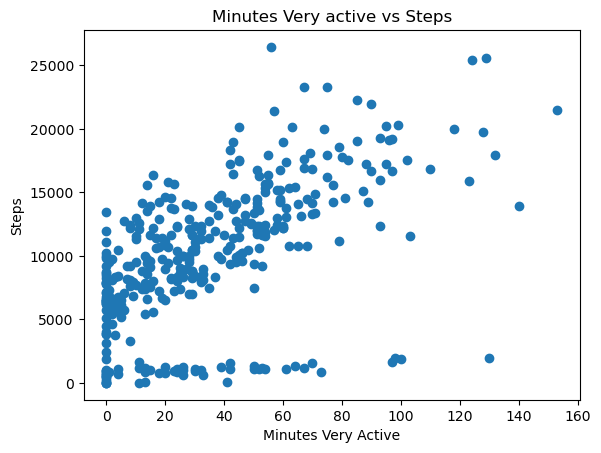

In [154]:
x= fitbit['Minutes Very Active']
y= fitbit['Steps']

plt.scatter(x,y)
plt.title("Minutes Very active vs Steps")
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [155]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

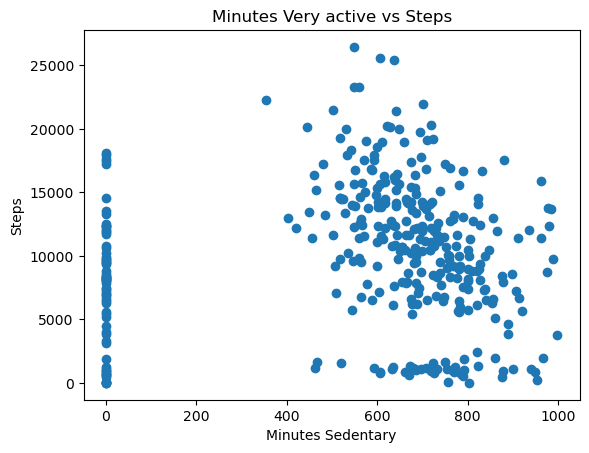

In [156]:
x= fitbit['Minutes Sedentary']
y= fitbit['Steps']

plt.scatter(x,y)
plt.title("Minutes Very active vs Steps")
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""